In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('C:\\Users\\swathi Naga\\Downloads\\tips.csv')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape


(244, 7)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [6]:
df.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

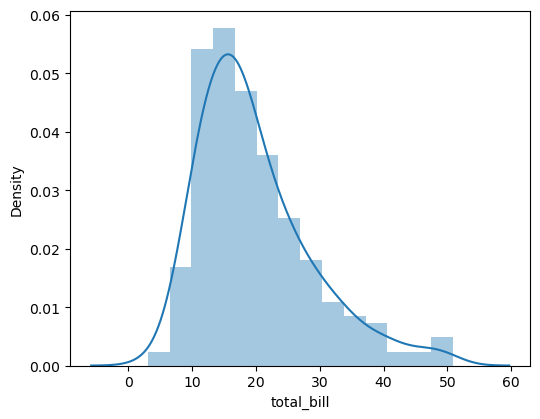

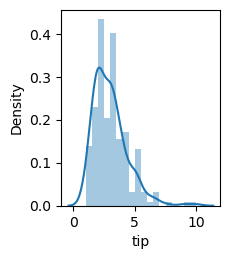

In [8]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(['total_bill', 'tip']):
    plt.subplot(2,3, i + 1)
    sb.distplot(df[col])
    plt.tight_layout()
    plt.show()


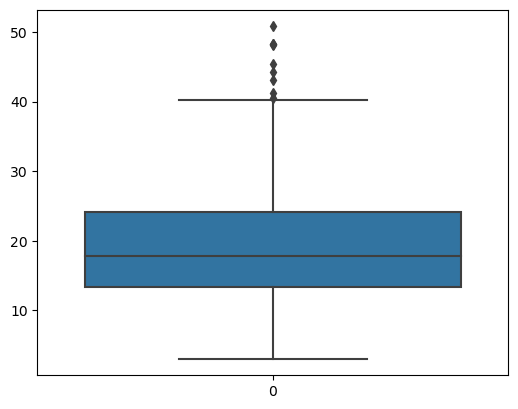

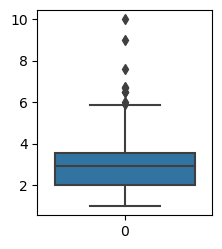

In [10]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(['total_bill', 'tip']):
    plt.subplot(2,3, i + 1)
    sb.boxplot(df[col])
    plt.tight_layout()
    plt.show()


In [11]:
df.shape, df[(df['total_bill']<45) & (df['tip']<7)].shape


((244, 7), (238, 7))

In [12]:
df = df[(df['total_bill']<45) & (df['tip']<7)]


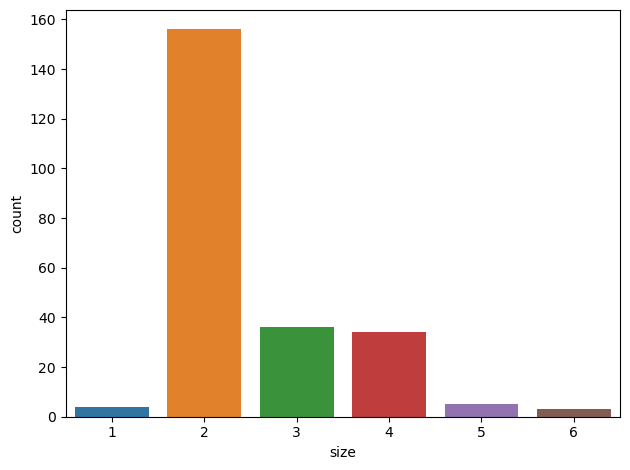

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming "feat" is a list of column names you want to plot
for col in feat:
    if df[col].dtype != 'object':  # Exclude non-numeric columns
        plt.figure()
        sb.countplot(data=df, x=col)
        plt.tight_layout()
        plt.show()


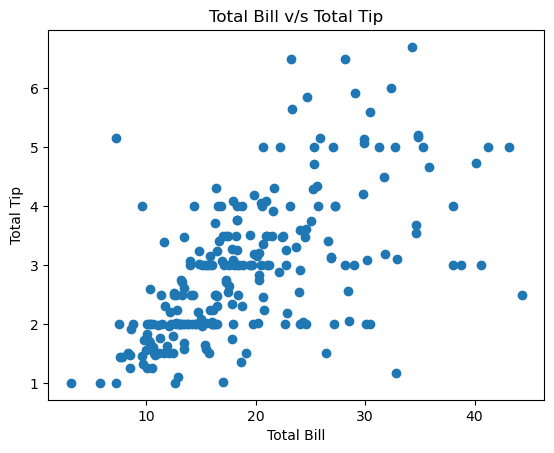

In [18]:
plt.scatter(df['total_bill'], df['tip'])
plt.title('Total Bill v/s Total Tip')
plt.xlabel('Total Bill')
plt.ylabel('Total Tip')
plt.show()


In [19]:
df.groupby(['size']).mean()


,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,21.899722,3.206667
4,27.137647,3.814706
5,30.068000,4.028000
6,30.383333,5.300000


In [20]:
df.groupby(['time']).mean()


,total_bill,tip,size
time,,,
Dinner,19.882059,2.966235,2.582353
Lunch,17.168676,2.728088,2.411765


In [21]:
df.groupby(['day']).mean()


,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,19.175542,2.736024,2.457831
Sun,20.724865,3.228243,2.797297
Thur,17.682742,2.771452,2.451613


In [23]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == object:
        df[col] = le.fit_transform(df[col])
        df.head()


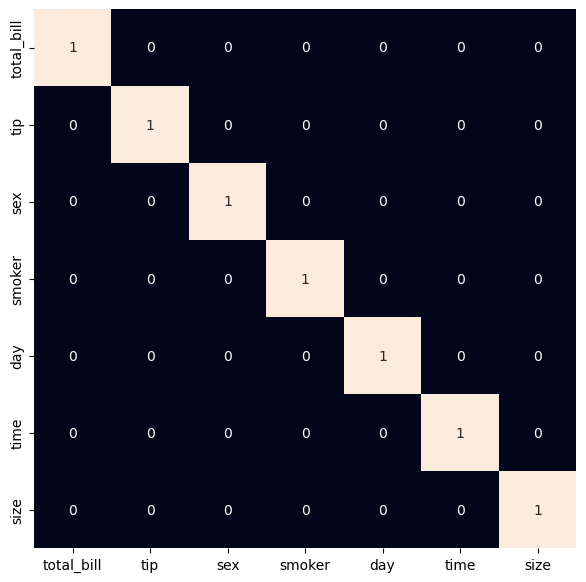

In [24]:
plt.figure(figsize=(7,7))
sb.heatmap(df.corr() > 0.7, annot = True, cbar = False)
plt.show()


In [25]:
features = df.drop('tip', axis=1)
target = df['tip']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)
X_train.shape, X_val.shape


((190, 6), (48, 6))

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [28]:
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor(), AdaBoostRegressor()]

for i in range(4):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    pred_train = models[i].predict(X_train)
    print('Training Accuracy : ', mae(Y_train, pred_train))

    pred_val = models[i].predict(X_val)
    print('Validation Accuracy : ', mae(Y_val, pred_val))
    print()


LinearRegression() : 
Training Accuracy :  0.6866406322422778
Validation Accuracy :  0.7903774704017298

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Accuracy :  0.02573618499856246
Validation Accuracy :  0.6996180667479832

RandomForestRegressor() : 
Training Accuracy :  0.27826789473684205